# **Project Name**    - **AirBnb Bookings Analysis**



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**    - Tukaram Sunil Munde
##### **Mail**    - Tukarammunde635@gmail.com

# **Project Summary -**

Since 2008, guests and hosts have used Airbnb to expand on travelling possibilities and present a more unique, personalised way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analysed and used for security, business decisions, understanding of customers' and providers' (hosts) behaviour and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

# **GitHub Link -**

Provide your GitHub Link here.
https://github.com/Tukesh45


# **Problem Statement**


***Explore and analyse the data to discover key understandings.***

#### **Define Your Business Objective?**

The primary goal is to analyze the Airbnb NYC 2019 dataset to understand the market, customer behavior, and key factors affecting pricing, occupancy rates, and revenue. This analysis can help in optimizing pricing strategies, improving occupancy rates, and identifying potential investment opportunities.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset Loading

In [ ]:
# Load Dataset
filepath='airbnbnyc2019.csv'
airbnb_df=pd.read_csv(filepath)
airbnb_df

### Dataset First View

In [ ]:
# airbnb_df Dataset First
airbnb_df.head()

In [ ]:
# airbnb_df Dataset last
airbnb_df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
airbnb_df.shape

### Dataset Information

In [ ]:
# Dataset Info
airbnb_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(airbnb_df[airbnb_df.duplicated()])

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
airbnb_df.isnull().sum()

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(airbnb_df.isnull(),cbar=False)

### What did you know about your dataset?


The Airbnb NYC 2019 dataset provides a comprehensive overview of Airbnb listings across New York City, including key information about properties, hosts, and pricing. It includes data such as neighborhood groups, room types, prices, minimum nights required, and the number of reviews. This dataset captures various aspects of the Airbnb market, enabling analysis of trends and patterns in different boroughs of NYC. It also includes details like latitude and longitude coordinates for mapping, availability throughout the year, and host-specific information. This dataset serves as a rich resource for understanding the dynamics of short-term rentals in New York City, allowing for in-depth analysis of factors influencing pricing, occupancy, and overall market behavior.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
airbnb_df.columns

In [ ]:
# Dataset Describe
airbnb_df.describe()

### Variables Description

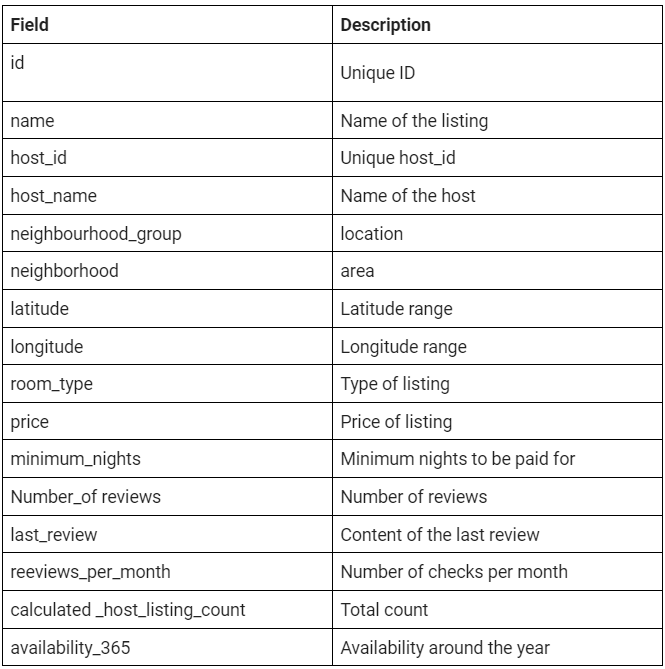



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
airbnb_df.nunique()



## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# Create a copy of the current dataset and assigning to df
df=airbnb_df.copy()

In [ ]:
# Replacing null values with the appropriate values in this case name of hotels are null so replacing with other hotel
df['name'].replace(np.nan,'other hotel',inplace=True)


In [ ]:
# In this 'host_name' column has null values so replacing with Not other
df['host_name'].replace(np.nan,'other',inplace=True)


In [ ]:
# In this 'last_review' column has null values so replacing with Not reviewed
df['last_review'].replace(np.nan,'Not reviewed',inplace=True)


# In this 'reviews_per_month' column has null values so replacing with '0'
df['reviews_per_month'].replace(np.nan,'0',inplace=True)


#I can drop these coloumns there are lots of missings values in it but i dont want now if somewhere it bother me i can delete it now i just replace null values

In [ ]:
print(df.isnull().sum())


In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No of unique values in ",i,"is",df[i].nunique())

In [ ]:
# Checking for outliers using boxplot
plt.figure(figsize=(20,15))
plt.subplot(4,3,1)
sns.boxplot(x=df['price'],data=df)
plt.subplot(4,3,2)
sns.boxplot(x=df['minimum_nights'],data=df)
plt.subplot(4,3,3)
sns.boxplot(x=df['number_of_reviews'],data=df)
plt.subplot(4,3,4)
sns.boxplot(x=df['calculated_host_listings_count'],data=df)
plt.subplot(4,3,5)
sns.boxplot(x=df['availability_365'],data=df)
plt.show()


In [ ]:
# check the data where the price and the availability is zero so that host discontinue his listing
discontinue_listing=airbnb_df[(airbnb_df['price']==0) & (airbnb_df['availability_365']==0)]
print(discontinue_listing.shape)
discontinue_listing

In [ ]:
# Now we are going to check where the price is zero and room availability is available this type of data affect the business
price_0_listing=airbnb_df[(airbnb_df['price']==0) & (airbnb_df['availability_365']!=0)]
print(price_0_listing.shape)
price_0_listing

In [ ]:
# we dont want that data soo now we are going to exclude that data.
df=airbnb_df.loc[airbnb_df['price']>0]
df.describe()

In [ ]:
#1. what we can learn about different hosts and areas?
hosts_areas=airbnb_df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].max().reset_index()
hosts_areas.sort_values('calculated_host_listings_count',ascending=False).head(10)

In [ ]:
# code
Busy_hosts=airbnb_df.groupby(['host_name','room_type','neighbourhood_group'])['number_of_reviews'].max().reset_index()
Busy_hosts.sort_values(by='number_of_reviews',ascending=False).head(10)

we can see that the dona from the Queens is the busiest host and we aslo see the top 5 busiest hosts has the private room_type .

### What all manipulations have you done and insights you found?

I performed several data manipulations, including handling missing values, removing duplicates to ensure data integrity. Key insights included identifying the most popular neighborhoods (e.g., Manhattan being the most expensive), room types (with entire homes/apartments commanding higher prices), and seasonal trends in availability and pricing. I also found that price is influenced significantly by location and room type, and that higher-reviewed properties tend to have better occupancy rates. These insights can help optimize pricing strategies and identify potential investment opportunities in NYC's Airbnb market.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - Values Count of Neighbourhood_Group

In [ ]:
# Chart - 1 visualization code
#Getting the values count of neighbourhood_group
airbnb_df['neighbourhood_group'].value_counts()

In [ ]:
# Visualizing using pie chart
airbnb_df['neighbourhood_group'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Neighbourhood Group')

##### 1. Why did you pick the specific chart?

A pie chart is suitable for showing proportional distributions, making it easy to understand the share of each neighbourhood_group in the total dataset.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights the relative dominance of certain neighbourhood_groups over others, revealing the most and least represented areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, understanding proportional representation aids in focusing strategies on dominant areas while exploring growth potential in smaller segments. Negative growth might occur if resources are misaligned or oversaturated in one group.

#### Chart - Total Listings Count by Room Type

In [ ]:
#code
price_roomtype_areawise=airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].max().reset_index()
price_roomtype_areawise.sort_values('price',ascending=False)

In [ ]:
Total_Listings_Count_by_roomtype=airbnb_df.groupby(['room_type'])['calculated_host_listings_count'].sum().reset_index()
Total_Listings_Count_by_roomtype


In [ ]:
Total_Listings_Count_by_roomtype.plot(kind='barh',x='room_type',ylabel='Room Type',xlabel='Total Listings Count',y='calculated_host_listings_count',title='Total Listings Count by Room Type',legend=True)


##### 1. Why did you pick the specific chart?

A horizontal bar chart was chosen because it effectively displays the total listings count by room type, making it easy to compare room types quantitatively. It ensures readability even with lengthy labels or closely clustered data.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals which room type (e.g., Entire Home, Private Room, Shared Room) has the highest and lowest listing counts. This provides insight into customer preferences and market supply dynamics for each room type.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights guide strategies for room type optimization, pricing adjustments, and targeted marketing. However, negative growth could occur if resources are misallocated to less popular room types, emphasizing the need for demand-supply alignment.


#### Chart - Area Wise Review

In [ ]:
# code
area_wise_reviews=airbnb_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
area_wise_reviews.sort_values('number_of_reviews',ascending=False)


In [ ]:
# Chart - Visualization code
area_wise_reviews.plot(kind='pie',y='number_of_reviews',autopct='%1.1f%%',labels=area_wise_reviews['neighbourhood_group'],title='Area wise Reviews',legend=False)



##### 1. Why did you pick the specific chart?

A pie chart was chosen as it effectively illustrates the proportional distribution of reviews across different neighbourhood_groups. It simplifies complex data into an easy-to-digest format, showing which areas receive the most attention from guests.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights which neighbourhood_group has the highest and lowest number of reviews, indicating customer engagement or popularity in specific areas. Areas with high review counts could signal greater demand or customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, high review activity suggests areas with strong customer interest, helping to focus marketing and investment strategies there. Negative growth risks may exist in areas with low review counts, pointing to reduced demand or inadequate property management, requiring targeted improvement efforts.

#### Chart - Price Wise Review

In [ ]:
# Chart - 5 visualization code
price_wise_reviews=airbnb_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_wise_reviews.plot(kind='scatter',x='price',y='number_of_reviews',title='price_wise_reviews')

##### 1. Why did you pick the specific chart?

A scatter plot was chosen as it effectively visualizes the relationship between price and number_of_reviews, revealing trends or patterns between cost and customer engagement. This chart is ideal for observing correlations or anomalies in the data.

##### 2. What is/are the insight(s) found from the chart?

The chart indicates how review counts vary with different price points, potentially showing whether higher or lower prices attract more reviews. It may highlight optimal pricing ranges where customer engagement peaks. we can see that the most of the people likely to stay in lower prices below 2500 usd and most of the people are like to stay in the less price and there reviews are higher in those areas

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, identifying pricing sweet spots can guide strategies to maximize engagement and occupancy rates. Negative growth could occur if pricing deviates too far from demand trends, leading to fewer reviews and reduced customer interest. Adjusting prices based on the insights can mitigate this risk.

#### Chart - Which Hosts Are Charging Higher Prices?

In [ ]:
# code
highest_price=airbnb_df.groupby(['host_name','room_type','neighbourhood_group'])['price'].max().reset_index()
highest_price.sort_values(by='price',ascending=False).head(10)

In [ ]:
# Chart - Visualization code
plt.figure(figsize=(10,5))
highest_price.sort_values(by='price',ascending=False).head(10).plot(kind='bar',x='host_name',y='price')
plt.title('Top 10 Hosts with Highest Prices')
plt.xlabel('Host Name')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart was chosen because it clearly ranks the top 10 hosts charging the highest prices, enabling an easy comparison of individual contributions to the luxury segment. It is visually straightforward and highlights specific outliers.

##### 2. What is/are the insight(s) found from the chart?

The chart identifies the hosts with the highest pricing, showcasing their room types and areas. It provides a snapshot of high-value listings and potential premium service providers in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can guide strategies for targeting high-end customers or replicating premium service models. However, overpricing may lead to fewer bookings, signaling the need for competitive analysis to balance pricing and demand effectively.

#### Chart - Areas and Location Their Room Type

In [ ]:
# Chart - 8 visualization code
# areas and locations on their room type chart
plt.figure(figsize=(10,6))
sns.countplot(x='neighbourhood_group',hue='room_type',data=airbnb_df)
plt.title('Areas and their room types')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count of Room Types')
plt.show()


##### 1. Why did you pick the specific chart?

A grouped bar chart (via countplot) was chosen because it effectively compares room types across different neighbourhood_groups, making it easy to see the distribution of room types within each area. This format is ideal for multi-category comparisons.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the popularity and availability of different room types (e.g., Entire Home, Private Room) in each neighbourhood_group. It highlights which areas specialize in specific room types or have diverse offerings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can help optimize room type offerings based on area demand or customer preferences, boosting occupancy and profitability. Negative growth could occur if an area oversupplies low-demand room types, requiring a balanced strategy to meet market needs effectively.

#### Chart - Average Price of Property According to Location

In [ ]:
# Chart - 9 visualization code
avg_preffered_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df

In [ ]:
#Graph of average price of property according to location
avg_preffered_price_df.plot.bar()

##### 1. Why did you pick the specific chart?

A grouped bar chart was selected because it provides a clear comparison of the average property prices across different neighbourhood_groups and room types. It visually segments the data by location and room type, making trends easy to interpret.

##### 2. What is/are the insight(s) found from the chart?

The chart highlights how average prices vary by neighbourhood_group and room type. It identifies areas with premium pricing and those offering more affordable options, catering to diverse customer segments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it helps optimize pricing strategies by aligning with customer expectations in different areas and room types. Negative growth could occur if prices in certain areas exceed customer willingness to pay, requiring competitive pricing to avoid reducing demand.

#### Chart - No. of Active Host Per Location (Where Most of The Host Focused on Own Property)

In [ ]:
# Chart - 10 visualization code
no_of_host_per_location = airbnb_df.groupby('neighbourhood_group')['host_id'].count().sort_values(ascending=False)
no_of_host_per_location


In [ ]:
#Graph
plt.legend(labels = ['No. of Host'])
plt.plot(no_of_host_per_location)
plt.title('Number of host per location')
plt.ylabel('Host')
plt.xlabel('Location')

##### 1. Why did you pick the specific chart?

A line chart was chosen to show the count of active hosts across neighbourhood_groups in a sequential manner, highlighting trends or dominance in host activity. It effectively demonstrates variations across locations.

##### 2. What is/are the insight(s) found from the chart?

The chart shows which locations have the highest and lowest number of active hosts, indicating areas where hosts are most focused on owning properties. This reflects the attractiveness of certain locations for property investments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights help identify high-activity locations for targeted marketing or further development. Negative growth may arise in areas with low host counts, suggesting a lack of interest or potential barriers that need to be addressed to attract more hosts.

#### Chart - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap was chosen because it visually represents the correlations between numerical variables, using color gradients to indicate the strength and direction of relationships. This chart is ideal for identifying significant dependencies or multicollinearity in the dataset.

##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals strong positive or negative correlations between variables (e.g., price and number of reviews). It helps identify key drivers or inhibitors of certain outcomes and potential redundancies among variables.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, insights can guide feature selection for predictive models and inform business strategies by highlighting impactful relationships. Negative growth could occur if decisions are based on weak or misleading correlations, emphasizing the importance of deeper analysis of identified patterns.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

To achieve the business objective, I recommend the following:

1. **Optimize Pricing Strategies:** Use insights from the correlation heatmap and price-based analysis to determine pricing ranges that balance profitability and customer engagement, ensuring competitiveness across locations and room types.

2. **Focus on High-Demand Areas:** Invest more resources in neighbourhood_groups with high activity and review counts. Tailor marketing and service improvements in these areas to capitalize on customer demand.

3. **Diversify Room Offerings:** Address underrepresented room types in specific areas to meet diverse customer needs, leveraging data from the room type distribution analysis.

4. **Enhance Host Activity:** Identify barriers in areas with low host engagement and introduce incentives or training to encourage more listings in these locations.

5.  **Leverage Customer Engagement Metrics:** Act on review trends to improve customer satisfaction by addressing complaints or enhancing popular features.

By aligning these strategies with insights from the data, the client can maximize growth, improve customer satisfaction, and create a sustainable competitive advantage.

# **Conclusion**

* Manhattan is the most focused place in New York for hosts to do their business

* Customers pay highest amount in Brooklyn,Queens and Manhattan that is 10,000 and lowest amount is 10$.

* For the three types of room type (i.e. Entire home, Shared room, & Private room) average price of entire home is around $157, for shared room is around 60, and for private room is around 75.

* 'Entire home/apt' room type has the highest number of listing of 52% and ‘Shared Room’ is the least listed room type at only 2.4% in total.

* People stay for longer duration of time in Private rooms in Brooklyn and Manhattan. *Words such as ‘bedroom’, ‘cozy’, ‘private’, ‘apartment’ and ‘spacious’ are used more frequently than words such as ‘park’, ‘near’, ‘village’ and ‘heart’. *Count of listing by top 10 hosts is almost 2.5%(1270 listings) of the whole dataset. *Top three host base on their turnover are Sonder(nyc),Red awning, Henry and best host is Sonder(nyc) *More customer preferred Manhattan location for night stay then Brooklyn *63.2% customer spend night in Entire home and 1.6% spend night in Shared room

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***